# Librerias y Lectura Archivos

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Input

In [2]:
#importacion df_final
df=pd.read_csv('../data/processed/final_merge.csv')

In [3]:
df

,edad,sexo,nivel_educativo,fumador,actividad_fisica,vive,diabetes,hipertension,obesidad,cancer,...,region_Sur,tipo_empleo_Desempleado,tipo_empleo_Privado,tipo_empleo_Público,tipo_empleo_Temporal,continente_America,continente_Antarctica,continente_Asia,continente_Europe,continente_Oceania
0,69,0,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1,32,1,2,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,89,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,78,1,1,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0
4,38,0,3,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47605,21,1,2,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
47606,35,0,3,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
47607,46,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
47608,56,1,3,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [4]:
df.shape

(47610, 48)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47610 entries, 0 to 47609
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     47610 non-null  int64  
 1   sexo                     47610 non-null  int64  
 2   nivel_educativo          47610 non-null  int64  
 3   fumador                  47610 non-null  int64  
 4   actividad_fisica         47610 non-null  int64  
 5   vive                     47610 non-null  int64  
 6   diabetes                 47610 non-null  int64  
 7   hipertension             47610 non-null  int64  
 8   obesidad                 47610 non-null  int64  
 9   cancer                   47610 non-null  int64  
 10  enfermedad_cardiaca      47610 non-null  int64  
 11  epoc                     47610 non-null  int64  
 12  glucosa                  47610 non-null  float64
 13  colesterol               47610 non-null  float64
 14  trigliceridos         

# Estandarización Variables

In [6]:
numerical_columns = ['edad', 'glucosa', 'colesterol', 'trigliceridos', 
                     'hemoglobina', 'leucocitos', 'plaquetas', 'creatinina', 
                     'ingresos_mensuales', 'gastos_salud']

In [7]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns].head()

,edad,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,ingresos_mensuales,gastos_salud
0,0.752464,1.182348,1.148022,0.538101,-0.269240,-0.948031,0.209374,-0.325816,1.525607,2.521666
1,-1.028350,-1.578028,-1.785944,-1.386118,0.182589,-0.084302,0.732393,-0.904565,2.597109,-0.876769
2,1.715066,-0.430133,-0.698475,-2.106839,-0.762145,0.494905,-0.120001,2.664386,1.103434,-0.876769
3,1.185635,-0.245735,0.305460,-0.964549,-0.567037,1.531380,-0.126206,1.072827,-0.003326,2.521666
4,-0.739569,-1.981947,-1.579386,-2.626722,-1.193437,1.165565,-0.402064,-0.759878,0.018125,-0.876769


## Red Neuronal

In [8]:
X = df.drop(columns='vive')
y = df['vive']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # salida binaria
])


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

In [12]:
# 6. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.8660 - loss: 0.3785 - precision: 0.8748 - recall: 0.9882 - val_accuracy: 0.8714 - val_loss: 0.3265 - val_precision: 0.8750 - val_recall: 0.9946
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8712 - loss: 0.3384 - precision: 0.8750 - recall: 0.9940 - val_accuracy: 0.8724 - val_loss: 0.3236 - val_precision: 0.8762 - val_recall: 0.9941
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8729 - loss: 0.3294 - precision: 0.8764 - recall: 0.9942 - val_accuracy: 0.8721 - val_loss: 0.3240 - val_precision: 0.8738 - val_recall: 0.9974
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8753 - loss: 0.3202 - precision: 0.8780 - recall: 0.9957 - val_accuracy: 0.8737 - val_loss: 0.3238 - val_precision: 0.8793 - val_recall: 0.9913
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8775 - loss: 0.3184 - precision: 0.8818 - recall: 0.9932 - val_accuracy: 0.8728 - va

In [13]:
y_probs = model.predict(X_test).ravel()
y_pred = (y_probs > 0.5).astype(int)

# 8. Resultados
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
Confusion Matrix:
 [[  55 1146]
 [  52 8269]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.05      0.08      1201
           1       0.88      0.99      0.93      8321

    accuracy                           0.87      9522
   macro avg       0.70      0.52      0.51      9522
weighted avg       0.83      0.87      0.83      9522

F1 Score: 0.9324537663509247


## Class Weight

In [14]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}
print("Pesos aplicados:", class_weight)

Pesos aplicados: {0: np.float64(3.9088669950738915), 1: np.float64(0.5733381502890174)}


In [15]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


Epoch 1/30
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.6363 - loss: 0.6422 - precision_1: 0.9284 - recall_1: 0.6300 - val_accuracy: 0.7583 - val_loss: 0.5743 - val_precision_1: 0.9471 - val_recall_1: 0.7657
Epoch 2/30
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7527 - loss: 0.5888 - precision_1: 0.9435 - recall_1: 0.7625 - val_accuracy: 0.7476 - val_loss: 0.6448 - val_precision_1: 0.9488 - val_recall_1: 0.7511
Epoch 3/30
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7545 - loss: 0.5689 - precision_1: 0.9482 - recall_1: 0.7605 - val_accuracy: 0.7553 - val_loss: 0.5700 - val_precision_1: 0.9486 - val_recall_1: 0.7607
Epoch 4/30
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7562 - loss: 0.5743 - precision_1: 0.9459 - recall_1: 0.7642 - val_accuracy: 0.7539 - val_loss: 0.5643 - val_precision_1: 0.9497 - val_recall_1: 0.7580
Epoch 5/30
953/953 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7585 - loss: 0.5684 - precision_1: 0.9479 - recall_1

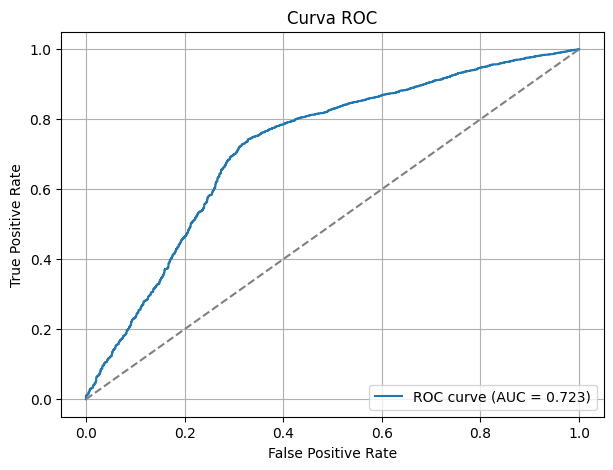

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# 8. Entrenar con pesos
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight,
                    verbose=1)

# 9. Evaluación
y_probs = model.predict(X_test).ravel()
y_pred = (y_probs > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# 10. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Tunner 1

In [ ]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

print(class_weight)

{0: np.float64(3.9088669950738915), 1: np.float64(0.5733381502890174)}


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.metrics import Precision
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# 1. Separar en train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Calcular class_weight
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

# 3. Definir modelo
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units1', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', 0.0, 0.5, step=0.1)))
    model.add(Dense(hp.Int('units2', 16, 64, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=[Precision()]
    )
    return model

# 4. Crear tuner personalizado
from keras_tuner.engine import tuner as kt_engine

class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['class_weight'] = class_weight
        return super().run_trial(trial, *args, **kwargs)

# 5. Instanciar tuner
tuner = MyTuner(
    build_model,
    objective='val_precision',  # <- maximiza la precisión
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuning_dir',
    project_name='maximize_precision'
)

# 6. Buscar
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)

# 7. Obtener mejor modelo
best_model = tuner.get_best_models(1)[0]

# 8. Evaluar
from sklearn.metrics import classification_report, confusion_matrix, f1_score
y_pred = (best_model.predict(X_val).ravel() > 0.5).astype(int)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Trial 10 Complete [00h 00m 06s]
val_precision: 0.9415661096572876

Best val_precision So Far: 0.9442086219787598
Total elapsed time: 00h 01m 06s
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
[[ 833  368]
 [2093 6228]]
              precision    recall  f1-score   support

           0       0.28      0.69      0.40      1201
           1       0.94      0.75      0.84      8321

    accuracy                           0.74      9522
   macro avg       0.61      0.72      0.62      9522
weighted avg       0.86      0.74      0.78      9522



/Users/martinagarciagonzalez/Library/Python/3.12/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hp.values

{'units1': 128,
 'dropout1': 0.30000000000000004,
 'units2': 32,
 'lr': 0.009519415634911517}

-****

In [23]:
model = build_model(best_hp)
model.fit(X_train, y_train, 
          epochs=30, 
          validation_data=(X_val, y_val), 
          class_weight=class_weight)

Epoch 1/30
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - loss: 0.6190 - precision_1: 0.9341 - val_loss: 0.5688 - val_precision_1: 0.9433
Epoch 2/30
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - loss: 0.5883 - precision_1: 0.9447 - val_loss: 0.5896 - val_precision_1: 0.9430
Epoch 3/30
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - loss: 0.5876 - precision_1: 0.9455 - val_loss: 0.5749 - val_precision_1: 0.9435
Epoch 4/30
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - loss: 0.5815 - precision_1: 0.9463 - val_loss: 0.4901 - val_precision_1: 0.9411
Epoch 5/30
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - loss: 0.5774 - precision_1: 0.9459 - val_loss: 0.6051 - val_precision_1: 0.9433
Epoch 6/30
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - loss: 0.5634 - precision_1: 0.9502 - val_loss: 0.6180 - val_precision_1: 0.9428
Epoch 7/30
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - loss: 0.5712 - precision_1: 0.9469 - val_loss: 0.5257 - val_precision_1: 0.9417
Epoch 8/30
1191/1191 ━━━━━━━━━━━━━

In [24]:
# Predecir sobre el conjunto de validación
y_probs = model.predict(X_val).ravel()
y_pred = (y_probs > 0.5).astype(int)

# Métricas de evaluación
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print(f"\nF1 Score: {f1_score(y_val, y_pred):.4f}")

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
Confusion Matrix:
[[ 855  346]
 [2612 5709]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.71      0.37      1201
           1       0.94      0.69      0.79      8321

    accuracy                           0.69      9522
   macro avg       0.59      0.70      0.58      9522
weighted avg       0.86      0.69      0.74      9522


F1 Score: 0.7942


In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Probabilidades predichas
y_probs = model.predict(X_val).ravel()

# Lista de umbrales a evaluar
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    print(f"\n🔎 UMBRAL: {t}")
    y_pred = (y_probs > t).astype(int)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred, digits=3))
    
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step

🔎 UMBRAL: 0.3
Confusion Matrix:
[[ 466  735]
 [1006 7315]]

Classification Report:
              precision    recall  f1-score   support

           0      0.317     0.388     0.349      1201
           1      0.909     0.879     0.894      8321

    accuracy                          0.817      9522
   macro avg      0.613     0.634     0.621      9522
weighted avg      0.834     0.817     0.825      9522

F1 Score: 0.8937

🔎 UMBRAL: 0.4
Confusion Matrix:
[[ 677  524]
 [1574 6747]]

Classification Report:
              precision    recall  f1-score   support

           0      0.301     0.564     0.392      1201
           1      0.928     0.811     0.865      8321

    accuracy                          0.780      9522
   macro avg      0.614     0.687     0.629      9522
weighted avg      0.849     0.780     0.806      9522

F1 Score: 0.8654

🔎 UMBRAL: 0.5
Confusion Matrix:
[[ 855  346]
 [2612 5709]]

Classification Report:
              pre

In [30]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [31]:
def focal_loss(alpha=0.75, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        alpha_factor = tf.where(K.equal(y_true, 1), 1 - alpha, alpha)
        focal_weight = alpha_factor * K.pow(1. - pt, gamma)
        return -K.mean(focal_weight * K.log(pt))
    return loss

In [32]:
model.compile(optimizer=Adam(0.001),
              loss=focal_loss(alpha=0.8),  # Más peso a la clase 0
              metrics=[Precision(), Recall()])

In [33]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - loss: 0.0353 - precision_3: 0.9606 - recall_1: 0.7218 - val_loss: 0.0306 - val_precision_3: 0.9478 - val_recall_1: 0.8362
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 0.0321 - precision_3: 0.9449 - recall_1: 0.8404 - val_loss: 0.0306 - val_precision_3: 0.9457 - val_recall_1: 0.8445
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - loss: 0.0330 - precision_3: 0.9447 - recall_1: 0.8426 - val_loss: 0.0306 - val_precision_3: 0.9465 - val_recall_1: 0.8396
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: 0.0323 - precision_3: 0.9452 - recall_1: 0.8410 - val_loss: 0.0306 - val_precision_3: 0.9468 - val_recall_1: 0.8412
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - loss: 0.0316 - precision_3: 0.9468 - recall_1: 0.8440 - val_loss: 0.0308 - val_precision_3: 0.9464 - val_recall_1: 0.8457
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - loss: 0.0317 - precision_3: 0.9447 - recall_1: 0.8437 

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


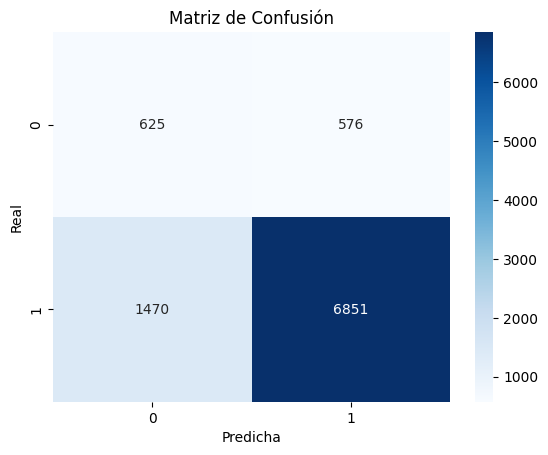

In [36]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicha")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.52      0.38      1201
           1       0.92      0.82      0.87      8321

    accuracy                           0.79      9522
   macro avg       0.61      0.67      0.62      9522
weighted avg       0.84      0.79      0.81      9522



In [38]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

print(class_weight)

{0: np.float64(3.9088669950738915), 1: np.float64(0.5733381502890174)}


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.metrics import Precision
from keras.metrics import Recall
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# 1. Separar en train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Calcular class_weight
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

# 3. Definir modelo
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units1', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', 0.0, 0.5, step=0.1)))
    model.add(Dense(hp.Int('units2', 16, 64, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=[Precision(),Recall()]
    )
    return model

# 4. Crear tuner personalizado
from keras_tuner.engine import tuner as kt_engine

class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['class_weight'] = class_weight
        return super().run_trial(trial, *args, **kwargs)

# 5. Instanciar tuner
tuner = MyTuner(
    build_model,
    objective='val_recall',  # <- maximiza la precisión
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuning_dir',
    project_name='maximize_precision'
)

# 6. Buscar
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)

# 7. Obtener mejor modelo
best_model = tuner.get_best_models(1)[0]

# 8. Evaluar
from sklearn.metrics import classification_report, confusion_matrix, f1_score
y_pred = (best_model.predict(X_val).ravel() > 0.5).astype(int)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Trial 10 Complete [00h 00m 07s]
val_recall: 0.7658935189247131

Best val_recall So Far: 0.7707006335258484
Total elapsed time: 00h 01m 09s
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
[[ 792  409]
 [1908 6413]]
              precision    recall  f1-score   support

           0       0.29      0.66      0.41      1201
           1       0.94      0.77      0.85      8321

    accuracy                           0.76      9522
   macro avg       0.62      0.72      0.63      9522
weighted avg       0.86      0.76      0.79      9522



/Users/martinagarciagonzalez/Library/Python/3.12/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import recall_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback

from keras_tuner import RandomSearch, Objective

# -----------------------------
# 1. Separar datos en train/val
# -----------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 2. Calcular class_weight
# -----------------------------
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

# -----------------------------
# 3. Definir modelo tunable
# -----------------------------
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units1', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', 0.0, 0.5, step=0.1)))
    model.add(Dense(hp.Int('units2', 16, 64, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']  # Puedes añadir más si quieres verlas, pero solo maximizamos recall_0
    )
    return model

# -----------------------------
# 4. Callback personalizado para recall clase 0
# -----------------------------
class RecallClase0Callback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        y_pred_prob = self.model.predict(self.X_val)
        y_pred = (y_pred_prob > 0.5).astype(int)
        recall_0 = recall_score(self.y_val, y_pred, pos_label=0)
        logs["val_recall_0"] = recall_0

# -----------------------------
# 5. Tuner con objetivo personalizado
# -----------------------------
tuner = RandomSearch(
    build_model,
    objective=Objective("val_recall_0", direction="max"),
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuning_dir',
    project_name='maximize_recall_clase0'
)

# -----------------------------
# 6. Lanzar búsqueda
# -----------------------------
recall_callback = RecallClase0Callback(X_val, y_val)

tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=10,
             callbacks=[recall_callback],
             class_weight=class_weight)

# -----------------------------
# 7. Evaluar el mejor modelo
# -----------------------------
best_model = tuner.get_best_models(1)[0]

y_pred_prob = best_model.predict(X_val).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred))

Trial 10 Complete [00h 00m 08s]
val_recall_0: 0.7035803497085762

Best val_recall_0 So Far: 0.7035803497085762
Total elapsed time: 00h 01m 18s
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
Matriz de confusión:
[[ 845  356]
 [2506 5815]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.25      0.70      0.37      1201
           1       0.94      0.70      0.80      8321

    accuracy                           0.70      9522
   macro avg       0.60      0.70      0.59      9522
weighted avg       0.86      0.70      0.75      9522



/Users/martinagarciagonzalez/Library/Python/3.12/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [43]:
# Obtener el mejor trial
best_trial = tuner.get_best_hyperparameters(1)[0]

# Mostrar los valores seleccionados
print("Mejores hiperparámetros encontrados:")
for key in best_trial.values:
    print(f"{key}: {best_trial.values[key]}")

Mejores hiperparámetros encontrados:
units1: 128
dropout1: 0.0
units2: 48
lr: 0.0038591074566364392


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear modelo final
final_model = Sequential()
final_model.add(Input(shape=(X_train.shape[1],)))
final_model.add(Dense(128, activation='relu'))
final_model.add(Dense(48, activation='relu'))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(
    optimizer=Adam(learning_rate=0.00386),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callback para detener si no mejora
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar con más épocas y pesos de clase
final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stop],
    class_weight=class_weight
)

Epoch 1/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7148 - loss: 0.6089 - val_accuracy: 0.7556 - val_loss: 0.5994
Epoch 2/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.7556 - loss: 0.5704 - val_accuracy: 0.7496 - val_loss: 0.5977
Epoch 3/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.7594 - loss: 0.5562 - val_accuracy: 0.7445 - val_loss: 0.5608
Epoch 4/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.7499 - loss: 0.5652 - val_accuracy: 0.7486 - val_loss: 0.5579
Epoch 5/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.7565 - loss: 0.5420 - val_accuracy: 0.7452 - val_loss: 0.5786
Epoch 6/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.7575 - loss: 0.5328 - val_accuracy: 0.7376 - val_loss: 0.5790
Epoch 7/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.7526 - loss: 0.5247 - val_accuracy: 0.7294 - val_loss: 0.5840
Epoch 8/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.7510 -

In [46]:
y_pred_prob = final_model.predict(X_val).ravel()  # Probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)          # Clasificaciones (0 o 1)

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.68      0.41      1201
           1       0.94      0.76      0.84      8321

    accuracy                           0.75      9522
   macro avg       0.62      0.72      0.62      9522
weighted avg       0.86      0.75      0.79      9522



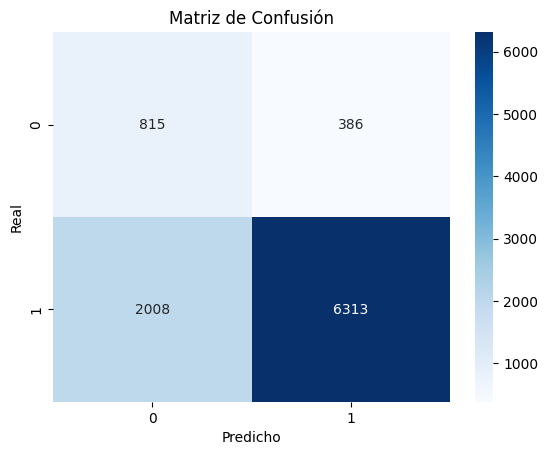

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [49]:
pesos_clase_0 = [1.0, 2.0, 3.0, 4.0, 5.0]
resultados = []

for peso_0 in pesos_clase_0:
    print(f"\n🔎 Probando class_weight: {{0: {peso_0}, 1: 1.0}}")

    # Definir el modelo
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.00386),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar con early stopping
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        class_weight={0: peso_0, 1: 1.0}
    )

    # Predecir
    y_pred_prob = model.predict(X_val).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calcular métricas
    precision_0 = precision_score(y_val, y_pred, pos_label=0)
    recall_0 = recall_score(y_val, y_pred, pos_label=0)
    cm = confusion_matrix(y_val, y_pred)

    print(f"Precision clase 0: {precision_0:.3f}")
    print(f"Recall clase 0:    {recall_0:.3f}")
    print(f"Matriz de confusión:\n{cm}")

    resultados.append({
        'peso_0': peso_0,
        'precision_0': precision_0,
        'recall_0': recall_0,
        'confusion_matrix': cm
    })

# Mostrar resumen final
print("\n📋 Resumen de resultados:")
for r in resultados:
    print(f"Peso 0: {r['peso_0']} | Precision 0: {r['precision_0']:.3f} | Recall 0: {r['recall_0']:.3f}")


🔎 Probando class_weight: {0: 1.0, 1: 1.0}
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
Precision clase 0: 0.508
Recall clase 0:    0.081
Matriz de confusión:
[[  97 1104]
 [  94 8227]]

🔎 Probando class_weight: {0: 2.0, 1: 1.0}
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
Precision clase 0: 0.413
Recall clase 0:    0.132
Matriz de confusión:
[[ 159 1042]
 [ 226 8095]]

🔎 Probando class_weight: {0: 3.0, 1: 1.0}
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step
Precision clase 0: 0.326
Recall clase 0:    0.366
Matriz de confusión:
[[ 439  762]
 [ 907 7414]]

🔎 Probando class_weight: {0: 4.0, 1: 1.0}
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
Precision clase 0: 0.299
Recall clase 0:    0.638
Matriz de confusión:
[[ 766  435]
 [1799 6522]]

🔎 Probando class_weight: {0: 5.0, 1: 1.0}
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
Precision clase 0: 0.297
Recall clase 0:    0.669
Matriz de confusión:
[[ 804  397]
 [1901 6420]]

📋 Resumen de resultados:
Peso 0: 1.0 | Precision 0: 0.508 | Recall 0: 0.081
Pes

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🧠 Modelo con 3 capas ocultas
model_3capas = Sequential()
model_3capas.add(Input(shape=(X_train.shape[1],)))
model_3capas.add(Dense(96, activation='relu'))   # Capa 1
model_3capas.add(Dense(64, activation='relu'))   # Capa 2
model_3capas.add(Dense(32, activation='relu'))   # Capa 3
model_3capas.add(Dense(1, activation='sigmoid')) # Capa de salida

# Compilación
model_3capas.compile(
    optimizer=Adam(learning_rate=0.00386),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento con class_weight
model_3capas.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    class_weight={0: 4.0, 1: 1.0},  # puedes ajustar el peso aquí
    verbose=1
)

Epoch 1/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.7791 - loss: 0.8035 - val_accuracy: 0.7536 - val_loss: 0.4770
Epoch 2/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.7643 - loss: 0.7571 - val_accuracy: 0.7592 - val_loss: 0.4639
Epoch 3/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.7689 - loss: 0.7481 - val_accuracy: 0.7619 - val_loss: 0.4130
Epoch 4/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.7668 - loss: 0.7483 - val_accuracy: 0.7691 - val_loss: 0.4266
Epoch 5/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.7696 - loss: 0.7446 - val_accuracy: 0.7714 - val_loss: 0.4885
Epoch 6/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.7773 - loss: 0.7322 - val_accuracy: 0.7747 - val_loss: 0.4471
Epoch 7/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.7809 - loss: 0.7127 - val_accuracy: 0.7529 - val_loss: 0.4755
Epoch 8/50
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.7816 -

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step

Matriz de confusión:
[[ 782  419]
 [1848 6473]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.30      0.65      0.41      1201
           1       0.94      0.78      0.85      8321

    accuracy                           0.76      9522
   macro avg       0.62      0.71      0.63      9522
weighted avg       0.86      0.76      0.80      9522



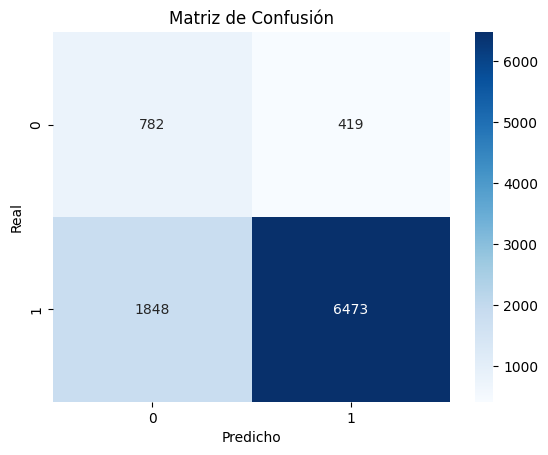

In [51]:
# Predicciones
y_pred_prob = model_3capas.predict(X_val).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Reporte de métricas
print("\nMatriz de confusión:")
cm = confusion_matrix(y_val, y_pred)
print(cm)

print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred))

# Visualización
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from keras_tuner.tuners import RandomSearch
from keras_tuner import Objective

# -------------------------------------------
# 1. Dividir en train / val
# -------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------------------
# 2. Definir class_weight manual
# -------------------------------------------
class_weight = {0: 4.0, 1: 1.0}  # ajusta si quieres

# -------------------------------------------
# 3. Callback para calcular recall clase 0
# -------------------------------------------
class RecallClase0Callback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val).ravel() > 0.5).astype(int)
        recall_0 = recall_score(self.y_val, y_pred, pos_label=0)
        logs['val_recall_0'] = recall_0

# -------------------------------------------
# 4. Definir modelo con 3 capas ocultas
# -------------------------------------------
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(hp.Int('units1', 64, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', 0.0, 0.3, step=0.1)))

    model.add(Dense(hp.Int('units2', 32, 96, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout2', 0.0, 0.3, step=0.1)))

    model.add(Dense(hp.Int('units3', 16, 64, step=16), activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# -------------------------------------------
# 5. Configurar Keras Tuner
# -------------------------------------------
tuner = RandomSearch(
    build_model,
    objective=Objective("val_recall_0", direction="max"),
    max_trials=10,
    executions_per_trial=1,
    directory='kt_3layers',
    project_name='recall_clase0'
)

# -------------------------------------------
# 6. Ejecutar búsqueda
# -------------------------------------------
recall_callback = RecallClase0Callback(X_val, y_val)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[recall_callback],
    class_weight=class_weight,
    verbose=1
)

# -------------------------------------------
# 7. Evaluar el mejor modelo
# -------------------------------------------
best_model = tuner.get_best_models(1)[0]

y_pred_prob = best_model.predict(X_val).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n🔍 Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\n📋 Reporte de clasificación:")
print(classification_report(y_val, y_pred))

Trial 10 Complete [00h 00m 16s]
val_recall_0: 0.6777685262281432

Best val_recall_0 So Far: 0.6860949208992506
Total elapsed time: 00h 02m 41s
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step

🔍 Matriz de confusión:
[[ 824  377]
 [2036 6285]]

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.29      0.69      0.41      1201
           1       0.94      0.76      0.84      8321

    accuracy                           0.75      9522
   macro avg       0.62      0.72      0.62      9522
weighted avg       0.86      0.75      0.78      9522



/Users/martinagarciagonzalez/Library/Python/3.12/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
